In [1]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript
indiatoday,[Music]\r\n\r\nthe Supreme Court's our yoga ve...
ndtv,hello and welcome you're watching left\r\n\r\n...
republic,hello and welcome ladies and gentlemen\r\n\r\n...


In [2]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

ModuleNotFoundError: No module named 'textblob'

In [9]:
[i for i in data.index]

['indiatoday', 'ndtv', 'republic']

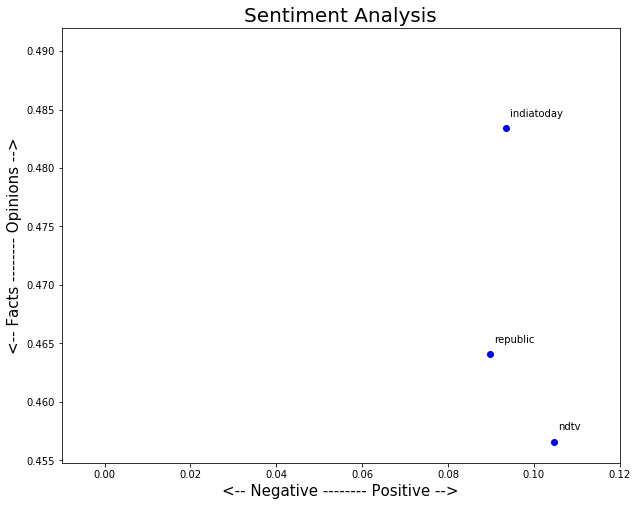

In [11]:
# Let's plot the results
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, channel in enumerate(data.index):
    x = data.polarity.loc[channel]
    y = data.subjectivity.loc[channel]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, channel, fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [12]:
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [13]:
data

,transcript,polarity,subjectivity
indiatoday,[Music]\n\nthe Supreme Court's our yoga verdic...,0.093503,0.483391
ndtv,hello and welcome you're watching left\n\nrigh...,0.104749,0.456583
republic,hello and welcome ladies and gentlemen\n\nthis...,0.089725,0.464094


In [14]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["[Music]\n\nthe Supreme Court's our yoga verdict was\n\ndelivered today five judge unanimous\n\nverdict that has given several big\n\ntakeaways if you've just joined us and\n\nnot followed the news through the day\n\nthese are the big takeaways the Supreme\n\nCourt says that the land at the disputed\n\nsite in erode they are the two point\n\nseven seven acres will be given to the\n\nRam Janmabhoomi Nia's they can build a\n\nROM under there the ROM Lala me respond\n\nwhich has been treated as a legal entity\n\ngets the entire disputed line five acres\n\nof several separate land will be given\n\nto the Sunni wok board whose claims have\n\nalso been recognized and it will have to\n\nbe given within the precincts of a ogia\n\nthe center has been asked to form a\n\ntrust under the Ayodhya Act which will\n\noversee the temple construction the\n\ncenter to frame a temple construction\n\nscheme in three months these are some of\n\nthe big takeaways that we've been given\n\nlet's listen in to

In [15]:
len(list_pieces)

3

In [16]:
len(list_pieces[0])

10

In [18]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.042313988095238085,
  0.16988411994509556,
  0.1008917047458714,
  0.06543281653746771,
  0.05406084656084656,
  0.06858858261919486,
  0.07065416065416066,
  0.022722899995627297,
  0.0570408163265306,
  0.2419472843940929],
 [0.12465828924162257,
  0.07567857142857141,
  0.13925417175417173,
  0.06466133004926107,
  0.08748872655122654,
  0.07447214734950584,
  0.118774062816616,
  0.09629539951573848,
  0.2263640780987719,
  0.03572845804988662],
 [0.13451706506054328,
  0.09349170782269371,
  0.11080668088130777,
  0.035134279300945974,
  0.09708936896436893,
  0.11026434293675674,
  0.03174957912457914,
  0.08418183312414082,
  0.10065295815295816,
  0.08474584278155708]]

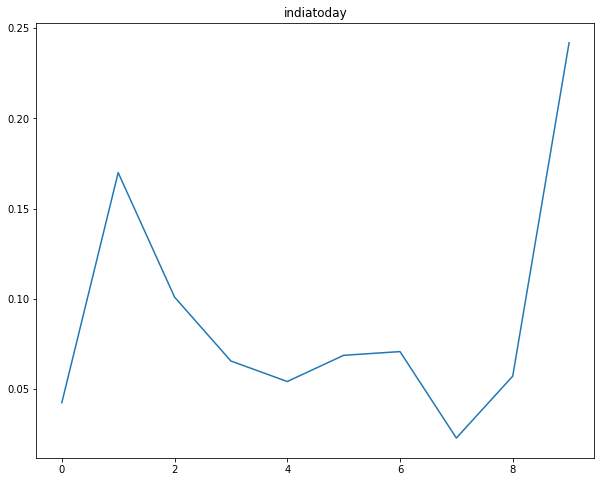

In [22]:
plt.plot(polarity_transcript[0])
plt.title(data.index[0])
plt.show()

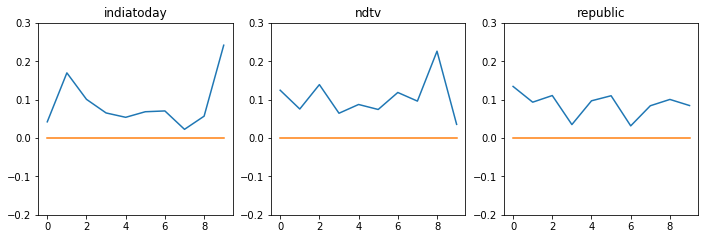

In [29]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, channel in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(channel)
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

Unusual to see every channel has been pretty posiitive regarding the ayodhya verdict